# Number-of-studies-in-inclusion-and-exclusion

    - Using parsed results from Facebook Clinical-Trial-Parser

## 1. Importing and exploring parsed results 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/ie_parsed_clinical_trials_11272020.tsv',sep='\t')
df.shape

(46714, 9)

In [3]:
df.head()

,#nct_id,eligibility_type,criterion,label,term,ner_score,concepts,tree_numbers,nel_score
0,NCT04644705,inclusion,Healthy male or female subjects in good health...,word_scores:gender,male female,0.999,Men,M01.390,1.0
1,NCT04644705,inclusion,Healthy male or female subjects in good health...,word_scores:gender,male female,0.999,Women,M01.975,1.0
2,NCT04644705,exclusion,Significant illness,word_scores:chronic_disease,illness,0.913,NaN,NaN,NaN
3,NCT04644705,exclusion,pregnant or lactating women,word_scores:pregnancy,pregnant,0.999,Pregnancy,G08.686.784.769,1.0
4,NCT04644705,exclusion,pregnant or lactating women,word_scores:gender,women,0.997,Women,M01.975,1.0


In [4]:
df['#nct_id'].nunique()

3380

There are 3380 unique trials in the parsed result

In [5]:
df.columns

Index(['#nct_id', 'eligibility_type', 'criterion', 'label', 'term',
       'ner_score', 'concepts', 'tree_numbers', 'nel_score'],
      dtype='object')

Getting a subset based on a unique group of '#nct_id', 'eligibility_type', 'concepts' columns

In [6]:
df = df.drop_duplicates(subset=['#nct_id', 'eligibility_type','concepts'])
df = df.dropna(subset=['concepts'])
df.shape

(25538, 9)

###  2. Combining some concepts

Combine MEN

In [8]:
df.concepts = df.concepts.replace('Men|Multiple Endocrine Neoplasia Type 2a|Multiple Endocrine Neoplasia Type 2b','Men')

Combine Immunosuppression

In [9]:
df.concepts = df.concepts.replace('Immunosuppression|Immunosuppression (Physiology)','Immunosuppression')

Combine Pregnancy

In [10]:
df[df.concepts.str.contains('Pregnancy')].concepts.value_counts()

Pregnancy                                                      1426
Pregnancy Tests                                                 225
Pregnancy, Unplanned                                              5
Hypertension, Pregnancy-Induced                                   2
Pregnancy in Adolescence                                          1
Pregnancy, Multiple                                               1
Pregnancy Trimesters                                              1
Pregnancy Complications|Pregnancy Complications, Infectious       1
Name: concepts, dtype: int64

In [11]:
df.concepts = df.concepts.replace('Pregnancy, Unplanned','Pregnancy')
df.concepts = df.concepts.replace('Pregnancy, Multiple','Pregnancy')

In [12]:
df[df.concepts.str.contains('Pregnancy')].concepts.value_counts()

Pregnancy                                                      1432
Pregnancy Tests                                                 225
Hypertension, Pregnancy-Induced                                   2
Pregnancy in Adolescence                                          1
Pregnancy Trimesters                                              1
Pregnancy Complications|Pregnancy Complications, Infectious       1
Name: concepts, dtype: int64

Combine Diabetes

In [13]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes Mellitus                                      206
Diabetes Mellitus, Type 1|Diabetes Mellitus, Type 2     36
Diabetes Mellitus, Type 1                                7
Diabetes Mellitus, Type 2                                6
Diabetes Insipidus                                       1
Diabetes, Gestational                                    1
Name: concepts, dtype: int64

In [14]:
df.concepts = df.concepts.replace('.*Diabetes.*','Diabetes',regex=True)

In [15]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes    257
Name: concepts, dtype: int64

Combine hypertension

In [16]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension                                                                                                             189
Hypertension, Pulmonary                                                                                                   41
Hypertension, Portal                                                                                                       9
Intracranial Hypertension                                                                                                  7
Pulmonary Arterial Hypertension                                                                                            5
Hypertension, Pregnancy-Induced                                                                                            2
Hypertension, Malignant                                                                                                    2
Familial Primary Pulmonary Hypertension|Idiopathic Pulmonary Arterial Hypertension|Pulmonary Hypertension, Primary, 1      2


In [17]:
df.concepts = df.concepts.str.replace('.*Hypertension.*','Hypertension',regex=True)

In [18]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension    257
Name: concepts, dtype: int64

Combine Liver disease

In [19]:
df[df.concepts.str.contains('Liver Diseases')].concepts.value_counts()

Liver Diseases               149
Liver Diseases, Alcoholic      3
Name: concepts, dtype: int64

In [20]:
df.concepts = df.concepts.str.replace('.*Liver Diseases.*','Liver Diseases',regex=True)

In [21]:
df[df.concepts.str.contains('Liver Diseases')].concepts.value_counts()

Liver Diseases    152
Name: concepts, dtype: int64

Combine Obesity

In [22]:
df[df.concepts.str.contains('Obesity')].concepts.value_counts()

Obesity|Obesity Management|Obesity, Morbid    70
Obesity, Morbid                                7
Obesity Hypoventilation Syndrome               1
Name: concepts, dtype: int64

In [23]:
df.concepts = df.concepts.str.replace('.*Obesity.*','Obesity',regex=True)

In [24]:
df[df.concepts.str.contains('Obesity')].concepts.value_counts()

Obesity    78
Name: concepts, dtype: int64

Combine CKD

In [25]:
df.concepts = df.concepts.str.replace('Renal Insufficiency, Chronic','Chronic Kidney Diseases',regex=False)

In [26]:
df[df.concepts.str.contains('Chronic Kidney Diseases')].concepts.value_counts()

Chronic Kidney Diseases    163
Name: concepts, dtype: int64

Change 'Kidney', 'Kidney Failure' as 'Kidney Diseases'

In [27]:
df[df.concepts.str.contains('Kidney')].concepts.value_counts()

Chronic Kidney Diseases    163
Kidney                     157
Kidney Failure, Chronic     77
Kidney Failure              68
Kidney Diseases             41
Acute Kidney Injury         20
Kidney Failure, Acute        7
Kidney Transplantation       6
Kidney Calculi               5
Solitary Kidney              1
Name: concepts, dtype: int64

In [28]:
df.concepts = df.concepts.str.replace('.*Kidney Failure.*','Kidney Diseases')

In [29]:
df[df.concepts.str.contains('Kidney')].concepts.value_counts()

Kidney Diseases            193
Chronic Kidney Diseases    163
Kidney                     157
Acute Kidney Injury         20
Kidney Transplantation       6
Kidney Calculi               5
Solitary Kidney              1
Name: concepts, dtype: int64

In [30]:
for i,row in df.iterrows():
    if(row['concepts'] == 'Kidney'):
        df.loc[i,'concepts'] = 'Kidney Diseases'

In [31]:
df[df.concepts.str.contains('Kidney')].concepts.value_counts()

Kidney Diseases            350
Chronic Kidney Diseases    163
Acute Kidney Injury         20
Kidney Transplantation       6
Kidney Calculi               5
Solitary Kidney              1
Name: concepts, dtype: int64

Delete Respiratory Rate

In [32]:
df[df.concepts.str.contains('Respiratory Rate')].concepts.value_counts()

Respiratory Rate    195
Name: concepts, dtype: int64

In [33]:
df = df[~df.concepts.str.contains('Respiratory Rate')]

In [34]:
df.shape

(25343, 9)

## 3. Spliting inclusion and exclusion criteria

In [35]:
df1 = df[df.eligibility_type == 'exclusion']
df1.shape

(18606, 9)

In [36]:
df2 = df[df.eligibility_type == 'inclusion']
df2.shape

(6737, 9)

In [37]:
df1.concepts.value_counts()[:30]

Pregnancy                                 1315
Women                                      630
Therapeutics                               394
Kidney Diseases                            312
COVID-19                                   294
Cancer                                     292
HIV|HIV Infections                         225
Hypertension                               185
Ventilation, Mechanical                    173
Hydroxychloroquine                         159
Hepatitis C                                151
Dialysis                                   149
Diabetes                                   148
Liver Diseases                             147
Hepatitis B                                141
Chronic Kidney Diseases                    138
Immunosuppression                          135
Myocardial Infarction                      130
Extracorporeal Membrane Oxygenation        128
Pregnant Women                             127
Heart Failure                              125
Pulmonary Dis

In [38]:
df2.concepts.value_counts()[:30]

COVID-19                                  799
Women                                     576
Men                                       575
Polymerase Chain Reaction                 223
Pneumonia                                 153
Therapeutics                              145
Pregnancy                                 117
Diabetes                                  109
Ventilation, Mechanical                   105
Pregnancy Tests                           101
Dyspnea                                    88
Respiratory Distress Syndrome, Adult       79
Infections                                 78
Respiratory Failure                        75
Hypertension                               72
Cancer                                     64
Fever|Hyperthermia, Induced                60
Obesity                                    50
Language Fluency, English                  49
Pulmonary Disease, Chronic Obstructive     45
Noninvasive Ventilation                    43
Kidney Diseases                   

Text(0.5, 1.0, 'Number of studies using the exclusion criterion')

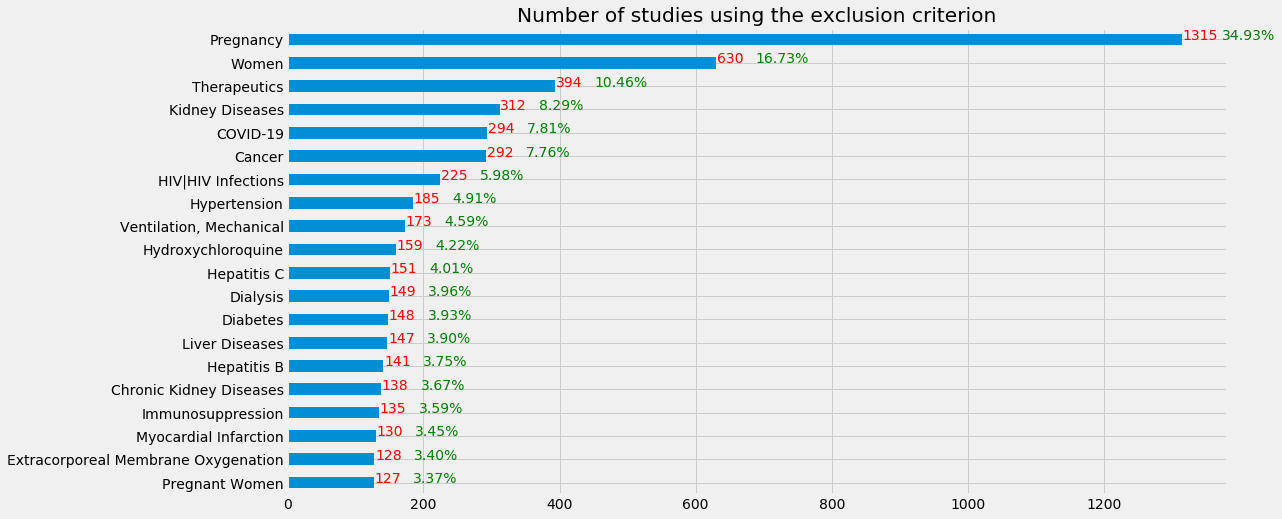

In [48]:
fig1 = plt.figure(figsize=(15,8))
df1.concepts.value_counts()[:20][::-1].plot.barh()
for i,v in enumerate(df1.concepts.value_counts()[:20][::-1]):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 58, i , ("{:.2%}".format(v/3765)), color = 'green')
plt.title('Number of studies using the exclusion criterion')

In [50]:
# fig1.savefig("./data/Concept_frequency_in_exclusion.png", dpi=300, bbox_inches = "tight")

Text(0.5, 1.0, 'Number of studies using the inclusion criterion')

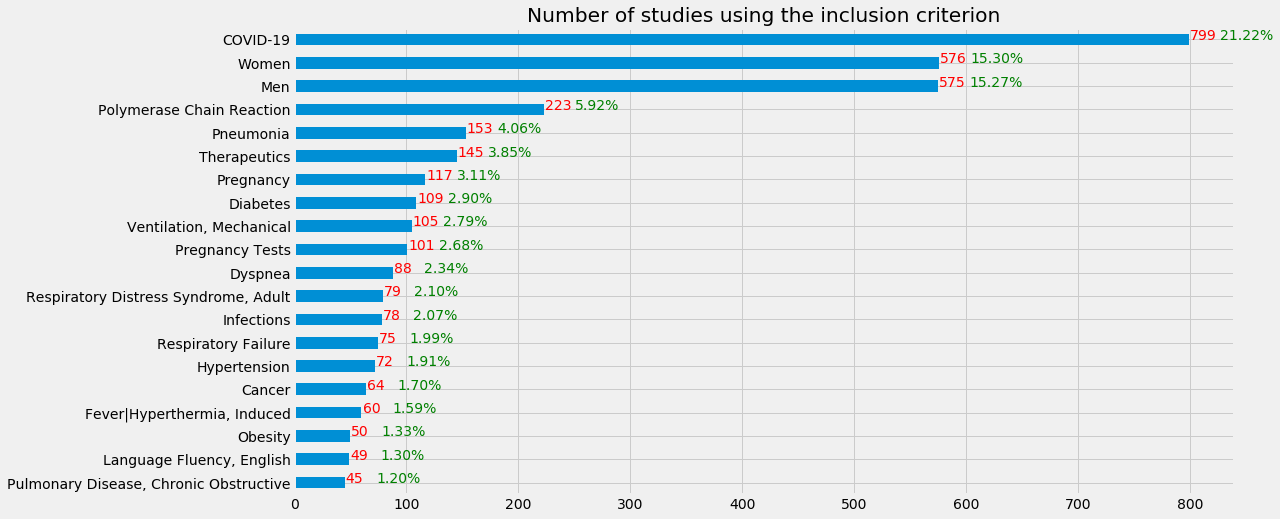

In [47]:
fig2 = plt.figure(figsize=(15,8))
df2.concepts.value_counts()[:20][::-1].plot.barh()
for i,v in enumerate(df2.concepts.value_counts()[:20][::-1]):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 28, i , ("{:.2%}".format(v/3765)), color = 'green')
plt.title('Number of studies using the inclusion criterion')

In [49]:
fig2.savefig("./data/Concept_frequency_in_inclusion.png", dpi=300, bbox_inches = "tight")